<a href="https://colab.research.google.com/github/subhashpolisetti/EDA-Timeseries-Tabular/blob/main/tree/main/Time%2520Series/Time_Series_Analysis_%26_Clustering_of_Air_Quality_Levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Air Quality Dataset Analysis

This notebook demonstrates an end-to-end analysis of the **Air Quality dataset**. It includes the following key steps:
- Data loading and preprocessing
- Exploratory Data Analysis (EDA)
- Anomaly detection
- Clustering using K-Means
- Regression modeling using AutoML (AutoViML)

## 1. Data Loading and Preprocessing

In this section, we load the **Air Quality dataset** and perform necessary data preprocessing steps. This includes:
- **Loading the dataset** using `pandas.read_csv()` with a semicolon delimiter.
- **Cleaning the dataset** by dropping unnecessary columns and combining the `Date` and `Time` columns to create a `Datetime` column. We also handle any missing or invalid date entries by removing rows with invalid date values.
- **Standardizing numeric values** by replacing commas with periods for decimal representation, ensuring that columns are properly converted to numeric data types.
- **Filtering out negative CO(GT) values** to ensure we only work with valid data.

## 2. Exploratory Data Analysis (EDA)

In this section, we explore the dataset to gain insights into the data:
- **Resampling** the data to weekly averages for the `CO(GT)` (Carbon Monoxide), `Temperature (T)`, and `Relative Humidity (RH)` columns. This allows us to observe long-term trends in the data.
- **Correlation Matrix**: We calculate and visualize the correlation matrix to understand the relationships between different variables, helping identify which features are highly correlated.

## 3. Anomaly Detection

In this section, we identify anomalies in the `CO(GT)` (Carbon Monoxide) column:
- **Z-Score Calculation**: We calculate the Z-scores for `CO(GT)` and identify anomalies based on a threshold of 3 standard deviations.
- **Visualizing Anomalies**: Anomalies are highlighted on a plot to visually assess any outliers in the `CO(GT)` data.

## 4. Clustering with K-Means

This section performs clustering on the dataset using the **K-Means algorithm**:
- **Feature Selection**: We select `CO(GT)`, `Temperature (T)`, `Relative Humidity (RH)`, and `Absolute Humidity (AH)` as features for clustering.
- **Clustering**: K-Means clustering is applied to these features to group the data into clusters.
- **Visualization**: A scatter plot is created to visualize the clusters based on the `CO(GT)` and `Temperature (T)` columns.

## 5. Machine Learning with AutoViML

In this section, we apply **AutoML** to build a regression model for predicting `CO(GT)` using the **AutoViML** package:
- **Data Splitting**: The dataset is split into training and testing sets using `train_test_split()`.
- **AutoViML Model**: AutoViML is used to automatically train a regression model, perform feature selection, and tune hyperparameters. The best model is identified, and the regression performance is evaluated using RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error).

### Conclusion

The analysis pipeline effectively preprocesses the data, explores key relationships, detects anomalies, performs clustering, and builds a robust regression model. The results offer valuable insights into air quality patterns and predictive modeling of pollutant levels.


In [2]:
from google.colab import files

# Prompt user to upload the dataset
uploaded = files.upload()


Saving AirQuality.csv to AirQuality (1).csv


In [3]:
import pandas as pd


file_path = '/content/AirQuality.csv'

# Load the dataset from the specified path
data = pd.read_csv(file_path, delimiter=';')

# Verify the first few rows of the dataset
data.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [6]:
# Drop unnecessary columns if they are empty or irrelevant
data = data.drop(columns=['Unnamed: 15', 'Unnamed: 16'], errors='ignore')

# Verify the remaining columns
data.columns


Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [7]:

# Get basic info on the dataset
data.info()

# Display summary statistics
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


# Data Cleaning & Preprocessing - Checking for Missing Values

In [8]:

# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [9]:
# Calculate the percentage of missing values
missing_percentage = data.isnull().mean() * 100
missing_percentage


,0
Date,1.203674
Time,1.203674
CO(GT),1.203674
PT08.S1(CO),1.203674
NMHC(GT),1.203674
C6H6(GT),1.203674
PT08.S2(NMHC),1.203674
NOx(GT),1.203674
PT08.S3(NOx),1.203674
NO2(GT),1.203674


In [10]:

# Impute missing values using forward fill
data.fillna(method='ffill', inplace=True)

# Verify that there are no missing values left
data.isnull().sum()

<ipython-input-10-fde588ff9eaf>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


# Exploratory Data Analysis (EDA)

In [11]:
# Attempt to parse Date and Time with the specified format
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')

# Identify rows with NaT in Datetime (failed parsing)
missing_dates = data[data['Datetime'].isna()]

# Display the first few rows that failed to parse
missing_dates[['Date', 'Time']].head()


,Date,Time


In [12]:
# Parse Date and Time columns separately, and then combine them
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H.%M.%S', errors='coerce').dt.time

# Combine Date and Time into a single Datetime column
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str), errors='coerce')

# Drop rows with NaT in the Datetime column
data = data.dropna(subset=['Datetime'])

# Set the Datetime column as the index
data = data.set_index('Datetime')

# Confirm the first few rows to ensure the index is set correctly
data.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2004-03-10,18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
2004-03-10 19:00:00,2004-03-10,19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2004-03-10 20:00:00,2004-03-10,20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
2004-03-10 21:00:00,2004-03-10,21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
2004-03-10 22:00:00,2004-03-10,22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [13]:
# Replace comma with period in all string columns and convert them to numeric
for column in data.columns:
    data[column] = data[column].astype(str).str.replace(',', '.')
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Display the first few rows to confirm changes
data.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,NaN,NaN,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,NaN,NaN,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,NaN,NaN,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,NaN,NaN,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,NaN,NaN,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


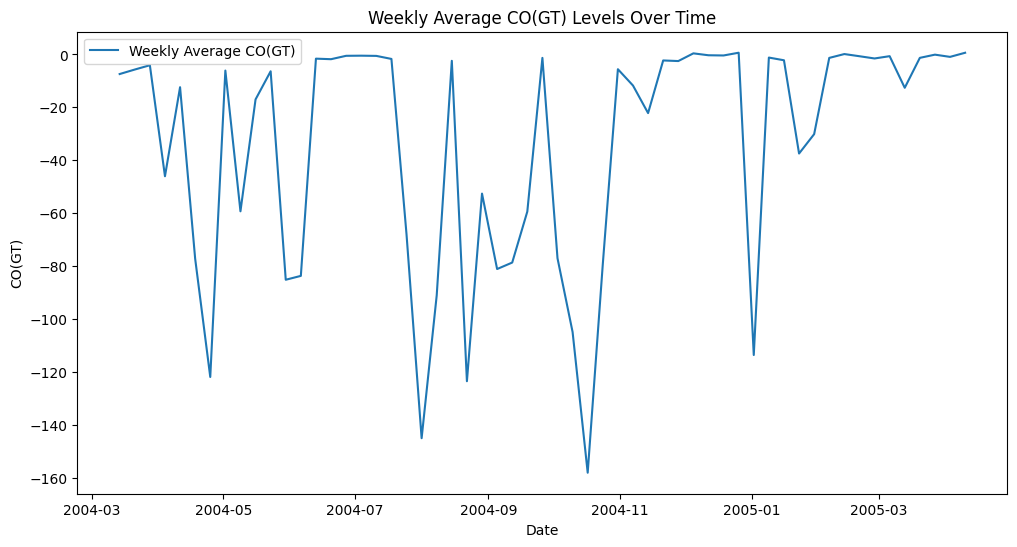

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

# Resample the CO(GT) column to weekly averages
weekly_data = data['CO(GT)'].resample('W').mean()

# Plot the resampled data
plt.figure(figsize=(12, 6))
plt.plot(weekly_data, label='Weekly Average CO(GT)')
plt.title('Weekly Average CO(GT) Levels Over Time')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.legend()
plt.show()


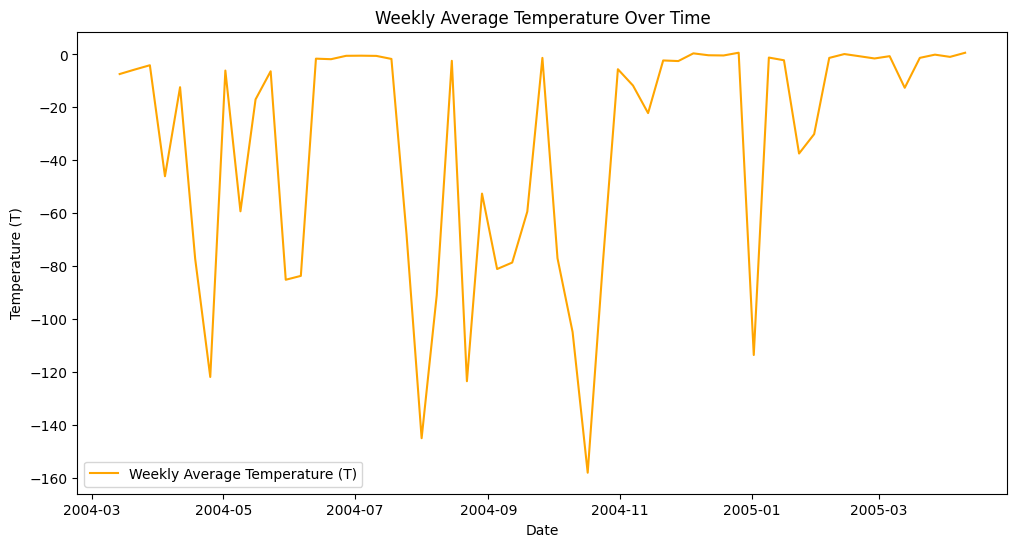

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_data, color='orange', label='Weekly Average Temperature (T)')
plt.title('Weekly Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (T)')
plt.legend()
plt.show()



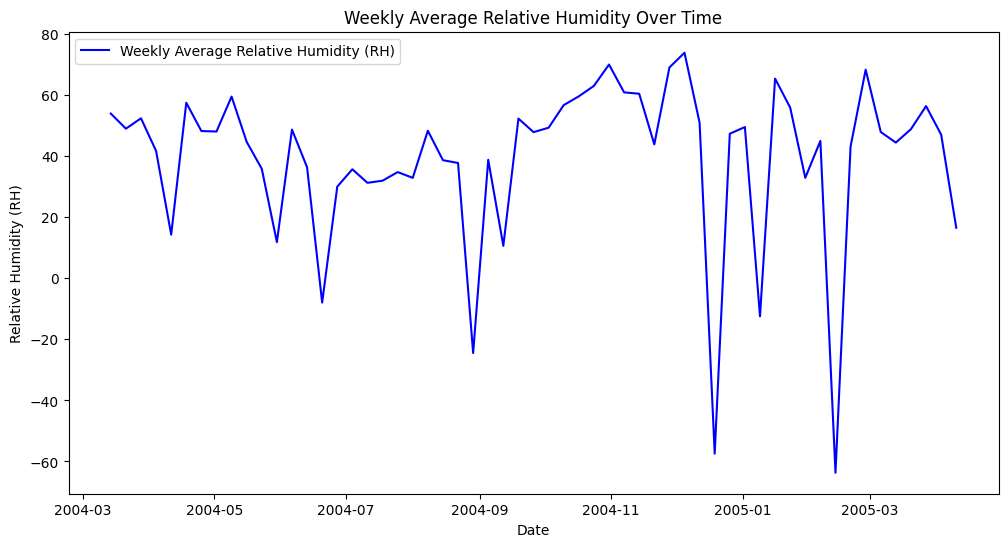

In [17]:

# Resample Relative Humidity (RH) to weekly averages and plot
weekly_humidity = data['RH'].resample('W').mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_humidity, color='blue', label='Weekly Average Relative Humidity (RH)')
plt.title('Weekly Average Relative Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (RH)')
plt.legend()
plt.show()

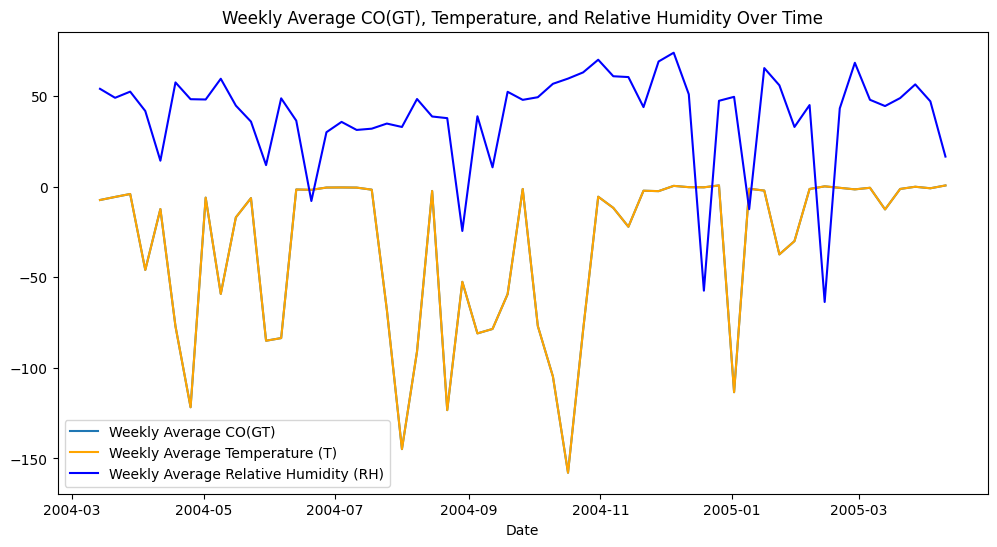

In [20]:

plt.figure(figsize=(12, 6))
plt.plot(weekly_data, label='Weekly Average CO(GT)')
plt.plot(weekly_data, label='Weekly Average Temperature (T)', color='orange')
plt.plot(weekly_humidity, label='Weekly Average Relative Humidity (RH)', color='blue')
plt.title('Weekly Average CO(GT), Temperature, and Relative Humidity Over Time')
plt.xlabel('Date')
plt.legend()
plt.show()

In [21]:
# Calculate the correlation matrix
correlation_matrix = data[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
                           'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']].corr()

# Display the correlation matrix
correlation_matrix

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041732,0.126467,-0.029960,0.032357,0.527421,-0.092224,0.672096,-0.076648,0.078184,-0.066331,-0.050986,-0.044761
PT08.S1(CO),0.041732,1.000000,0.169680,0.852558,0.932323,0.278051,0.086566,0.154028,0.843075,0.891481,0.754320,0.743754,0.764870
NMHC(GT),0.126467,0.169680,1.000000,0.036437,0.108350,-0.005738,0.050280,0.099758,0.164263,0.102284,-0.001533,0.010078,0.011828
C6H6(GT),-0.029960,0.852558,0.036437,1.000000,0.767546,-0.000081,0.510145,-0.008425,0.771296,0.639625,0.971199,0.921760,0.984546
PT08.S2(NMHC),0.032357,0.932323,0.108350,0.767546,1.000000,0.332601,-0.075836,0.180100,0.869083,0.906297,0.669792,0.581419,0.646673
NOx(GT),0.527421,0.278051,-0.005738,-0.000081,0.332601,1.000000,-0.437184,0.816675,0.032924,0.459597,-0.136230,-0.055196,-0.094898
PT08.S3(NOx),-0.092224,0.086566,0.050280,0.510145,-0.075836,-0.437184,1.000000,-0.259327,0.125313,-0.206641,0.584491,0.574683,0.619778
NO2(GT),0.672096,0.154028,0.099758,-0.008425,0.180100,0.816675,-0.259327,1.000000,-0.027848,0.248513,-0.079144,-0.086146,-0.058203
PT08.S4(NO2),-0.076648,0.843075,0.164263,0.771296,0.869083,0.032924,0.125313,-0.027848,1.000000,0.724141,0.749857,0.641946,0.689184
PT08.S5(O3),0.078184,0.891481,0.102284,0.639625,0.906297,0.459597,-0.206641,0.248513,0.724141,1.000000,0.500953,0.525891,0.518190


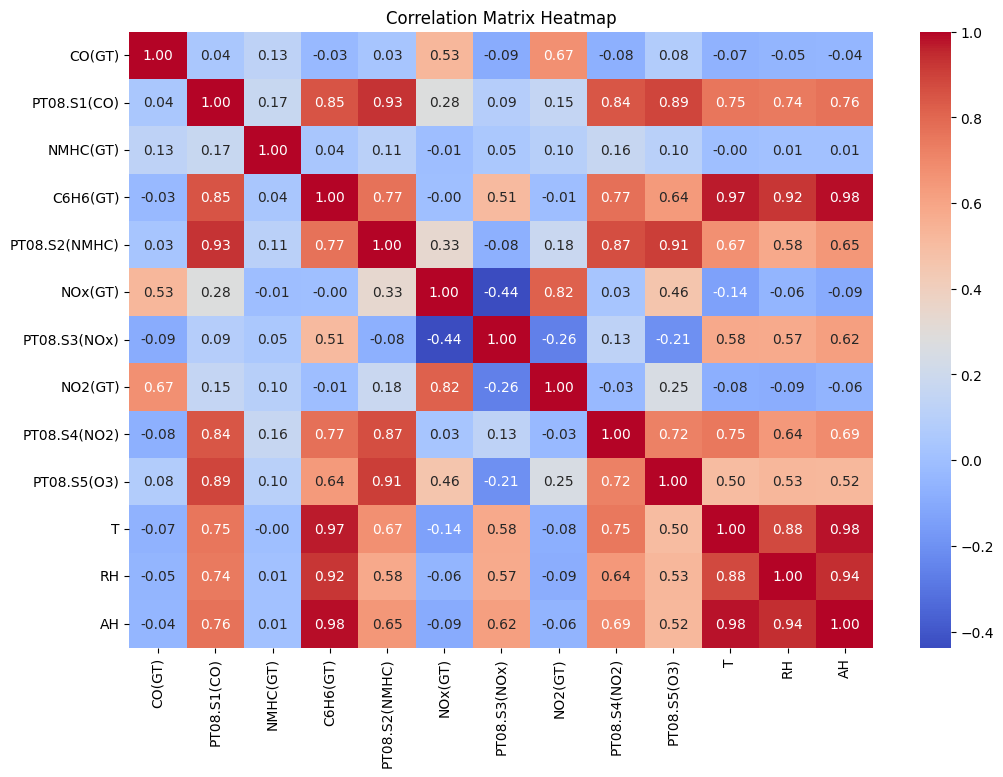

In [22]:
import seaborn as sns  # Importing seaborn for data visualization

# Set up the plot size for better clarity
plt.figure(figsize=(12, 8))  # Set the figure size to 12x8 inches

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# 'correlation_matrix' is the data being plotted.
# annot=True: Display the correlation coefficients in each cell of the heatmap.
# cmap='coolwarm': Specifies the color palette, where warmer colors (e.g., red) represent higher correlations.
# fmt='.2f': Format the annotations to show 2 decimal places.

# Add a title to the heatmap
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()


#Anomaly Detection and Clustering

<ipython-input-23-d6e7ba19003d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['CO_Z_Score'] = (data_filtered['CO(GT)'] - data_filtered['CO(GT)'].mean()) / data_filtered['CO(GT)'].std()
<ipython-input-23-d6e7ba19003d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Anomaly'] = data_filtered['CO_Z_Score'].apply(lambda x: 1 if abs(x) > threshold else 0)


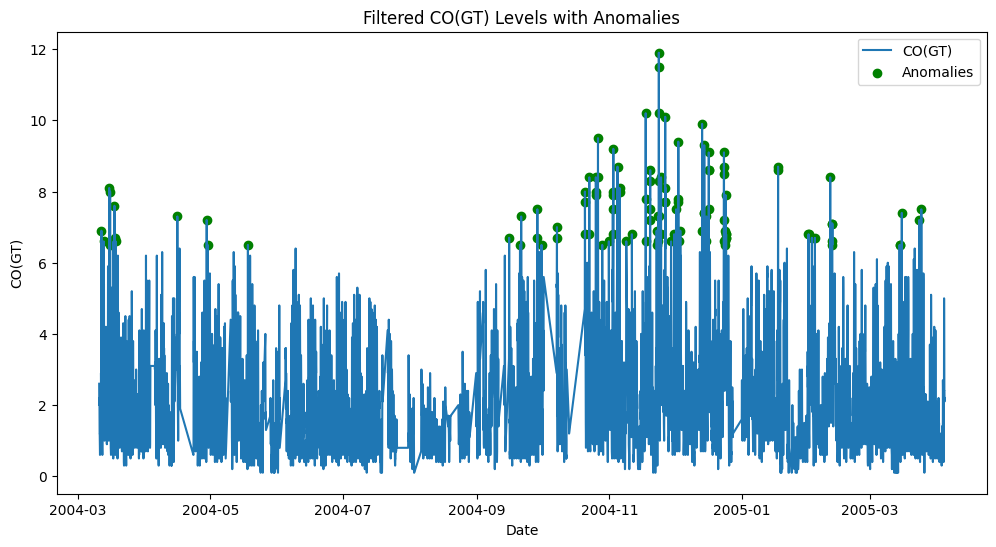

In [23]:

# Set threshold for Z-score anomalies
threshold = 3

# Filter out negative values in CO(GT)
data_filtered = data[data['CO(GT)'] >= 0]

# Recalculate Z-scores for CO(GT) in filtered data
data_filtered['CO_Z_Score'] = (data_filtered['CO(GT)'] - data_filtered['CO(GT)'].mean()) / data_filtered['CO(GT)'].std()

# Redefine anomalies with the Z-score threshold
data_filtered['Anomaly'] = data_filtered['CO_Z_Score'].apply(lambda x: 1 if abs(x) > threshold else 0)

# Plot CO(GT) with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(data_filtered.index, data_filtered['CO(GT)'], label='CO(GT)')
plt.scatter(data_filtered[data_filtered['Anomaly'] == 1].index, data_filtered[data_filtered['Anomaly'] == 1]['CO(GT)'], color='green', label='Anomalies')
plt.title('Filtered CO(GT) Levels with Anomalies')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.legend()
plt.show()

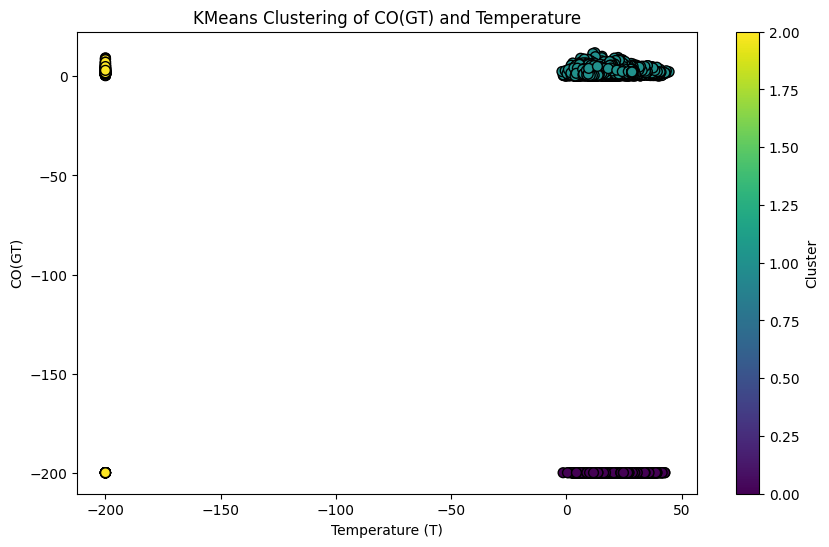

In [24]:
from sklearn.cluster import KMeans  # Importing KMeans from sklearn for clustering
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for feature standardization

# Select features for clustering
features = ['CO(GT)', 'T', 'RH', 'AH']  # Selecting features based on domain knowledge or correlation insights
data_cluster = data[features].dropna()  # Filter the dataset to include only the selected features and drop any missing values

# Standardize the features
scaler = StandardScaler()  # Create a StandardScaler object to scale the data
data_scaled = scaler.fit_transform(data_cluster)  # Standardize the selected features (mean=0, std=1)

# Apply KMeans clustering with a predefined number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)  # Create the KMeans model with 3 clusters and a fixed random state for reproducibility
data_cluster['Cluster'] = kmeans.fit_predict(data_scaled)  # Fit the KMeans model and assign cluster labels to each data point

# Plot the clusters for CO(GT) vs Temperature
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
plt.scatter(data_cluster['T'], data_cluster['CO(GT)'], c=data_cluster['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
# Create a scatter plot: X-axis represents Temperature (T), Y-axis represents CO(GT)
# Color each point by its cluster label (c=data_cluster['Cluster'])
# Use the 'viridis' color map to visually differentiate clusters, and set point size (s=50)

plt.title('KMeans Clustering of CO(GT) and Temperature')  # Add a title to the plot
plt.xlabel('Temperature (T)')  # Label the x-axis
plt.ylabel('CO(GT)')  # Label the y-axis
plt.colorbar(label='Cluster')  # Display a colorbar to show which color corresponds to which cluster
plt.show()  # Display the plot


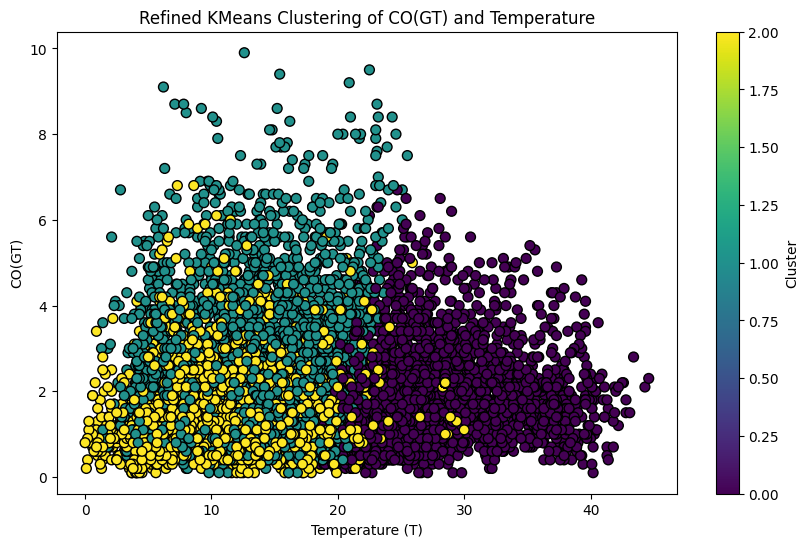

In [25]:

# Define reasonable ranges based on visual inspection or data percentiles
co_gt_range = (-10, 10)  # Example range for CO(GT)
temperature_range = (0, 50)  # Example range for Temperature

# Filter the data
filtered_data = data[(data['CO(GT)'] >= co_gt_range[0]) & (data['CO(GT)'] <= co_gt_range[1]) &
                     (data['T'] >= temperature_range[0]) & (data['T'] <= temperature_range[1])]

# Select features for clustering
features = ['CO(GT)', 'T', 'RH', 'AH']
data_cluster = filtered_data[features].dropna()

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)

# Reapply KMeans with a predefined number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data_cluster['Cluster'] = kmeans.fit_predict(data_scaled)

# Plot the clusters for CO(GT) vs Temperature after filtering
plt.figure(figsize=(10, 6))
plt.scatter(data_cluster['T'], data_cluster['CO(GT)'], c=data_cluster['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Refined KMeans Clustering of CO(GT) and Temperature')
plt.xlabel('Temperature (T)')
plt.ylabel('CO(GT)')
plt.colorbar(label='Cluster')
plt.show()

# Modeling with AutoML using AutoViML

In [26]:
!pip install autoviml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-ensemble to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/

In [1]:

!pip install scipy==1.7.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 69.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.7.3 which is incompatible.
arviz 0.20.0 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
a

In [4]:

import pandas as pd
from autoviml.Auto_ViML import Auto_ViML
from sklearn.model_selection import train_test_split

Imported Auto_ViML version: 0.1.800. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            GPU_flag=False, verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [5]:
data = data.drop(columns=['Unnamed: 15', 'Unnamed: 16'], errors='ignore')

# Convert Date and Time columns to strings
data['Date'] = data['Date'].astype(str)
data['Time'] = data['Time'].astype(str)

# Specify the format explicitly for date-time conversion
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')

# Drop rows with NaT in Datetime and set as index
data = data.dropna(subset=['Datetime'])
data = data.set_index('Datetime')

# Verify the shape after date-time conversion
print("After Date-Time Conversion, Shape:", data.shape)
data.head()

After Date-Time Conversion, Shape: (9357, 15)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18.00.00,"2,6","1,360.00",150.00,"11,9","1,046.00",166.00,"1,056.00",113.00,"1,692.00","1,268.00","13,6","48,9","0,7578"
2004-03-10 19:00:00,10/03/2004,19.00.00,2,"1,292.00",112.00,"9,4",955.00,103.00,"1,174.00",92.00,"1,559.00",972.00,"13,3","47,7","0,7255"
2004-03-10 20:00:00,10/03/2004,20.00.00,"2,2","1,402.00",88.00,"9,0",939.00,131.00,"1,140.00",114.00,"1,555.00","1,074.00","11,9","54,0","0,7502"
2004-03-10 21:00:00,10/03/2004,21.00.00,"2,2","1,376.00",80.00,"9,2",948.00,172.00,"1,092.00",122.00,"1,584.00","1,203.00","11,0","60,0","0,7867"
2004-03-10 22:00:00,10/03/2004,22.00.00,"1,6","1,272.00",51.00,"6,5",836.00,131.00,"1,205.00",116.00,"1,490.00","1,110.00","11,2","59,6","0,7888"


In [6]:

# Convert comma decimal separators to periods, then cast columns to numeric
for column in data.columns:
    data[column] = data[column].astype(str).str.replace(',', '.')
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Filter out rows with negative CO(GT) values
data = data[data['CO(GT)'] >= 0]

# Verify the data after filtering
print("After Filtering Negative CO(GT), Shape:", data.shape)
data.head()

After Filtering Negative CO(GT), Shape: (7674, 15)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,NaN,NaN,2.60,"1,360.00",150.00,11.90,"1,046.00",166.00,"1,056.00",113.00,"1,692.00","1,268.00",13.60,48.90,0.76
2004-03-10 19:00:00,NaN,NaN,2.00,"1,292.00",112.00,9.40,955.00,103.00,"1,174.00",92.00,"1,559.00",972.00,13.30,47.70,0.73
2004-03-10 20:00:00,NaN,NaN,2.20,"1,402.00",88.00,9.00,939.00,131.00,"1,140.00",114.00,"1,555.00","1,074.00",11.90,54.00,0.75
2004-03-10 21:00:00,NaN,NaN,2.20,"1,376.00",80.00,9.20,948.00,172.00,"1,092.00",122.00,"1,584.00","1,203.00",11.00,60.00,0.79
2004-03-10 22:00:00,NaN,NaN,1.60,"1,272.00",51.00,6.50,836.00,131.00,"1,205.00",116.00,"1,490.00","1,110.00",11.20,59.60,0.79


##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (6139, 13)
    Training Set Memory Usage = 0.66 MB
Test Set Shape = (1535, 12)
    Test Set Memory Usage = 0.15 MB
Single_Label Target: ['CO(GT)']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  12
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boole

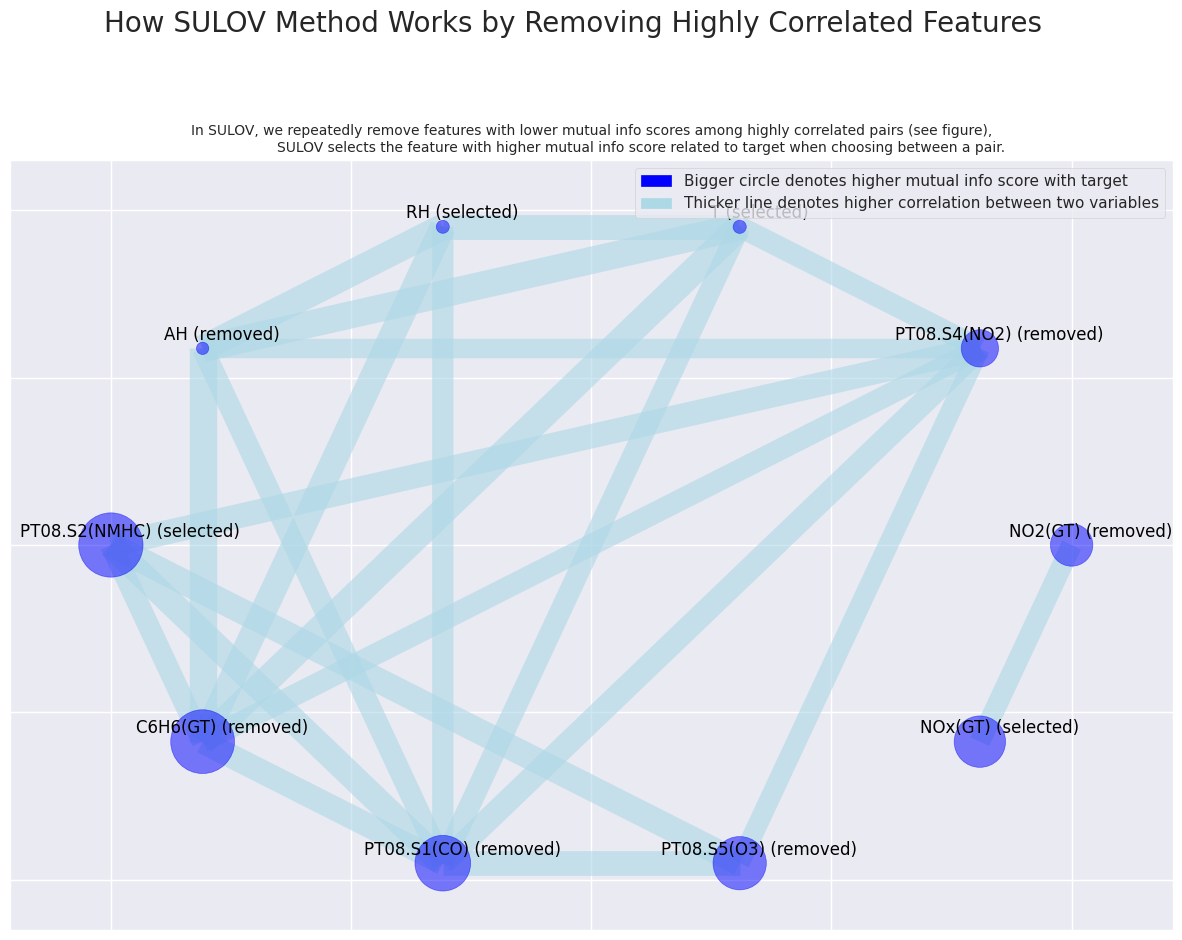

Splitting selected features into float and categorical (integer) variables:
    (6) float variables ...
    (0) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 6 
    Finding Important Features using Boosted Trees algorithm...
        using 6 variables...
        using 4 variables...
        using 2 variables...
Found 6 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  4911 , CV rows =  1228
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling of train and validation data
###################################

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.
RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.


    Actual training time (in seconds): 62
###########  Single_Label  M O D E L   R E S U L T S #################
5-fold Cross Validation rmse Score = 0.5612
    Best Parameters for Model = {'C': 21.16867855893635, 'epsilon': 0.5543457845906854}
########################################################
Linear Model Prediction Results on Held Out CV Data Set:
Regression Plots completed in 0.046 seconds
    MAE = 0.3663
    MAPE = 30% (MAPE will be very high when zeros in actuals)
    RMSE = 0.5579
    Normalized MAE (as % std dev of Actuals) = 25%
    Normalized RMSE (% of Std Dev of Actuals) = 38%
################# E N S E M B L E  M O D E L  ##################
Time taken = 3 seconds
Based on trying multiple models, Best type of algorithm for this data set is Bagging_Regressor
    Displaying results of weighted average ensemble of 5 regressors
#############################################################################
Regression Plots completed in 0.050 seconds
    MAE = 0.3450
    MAP

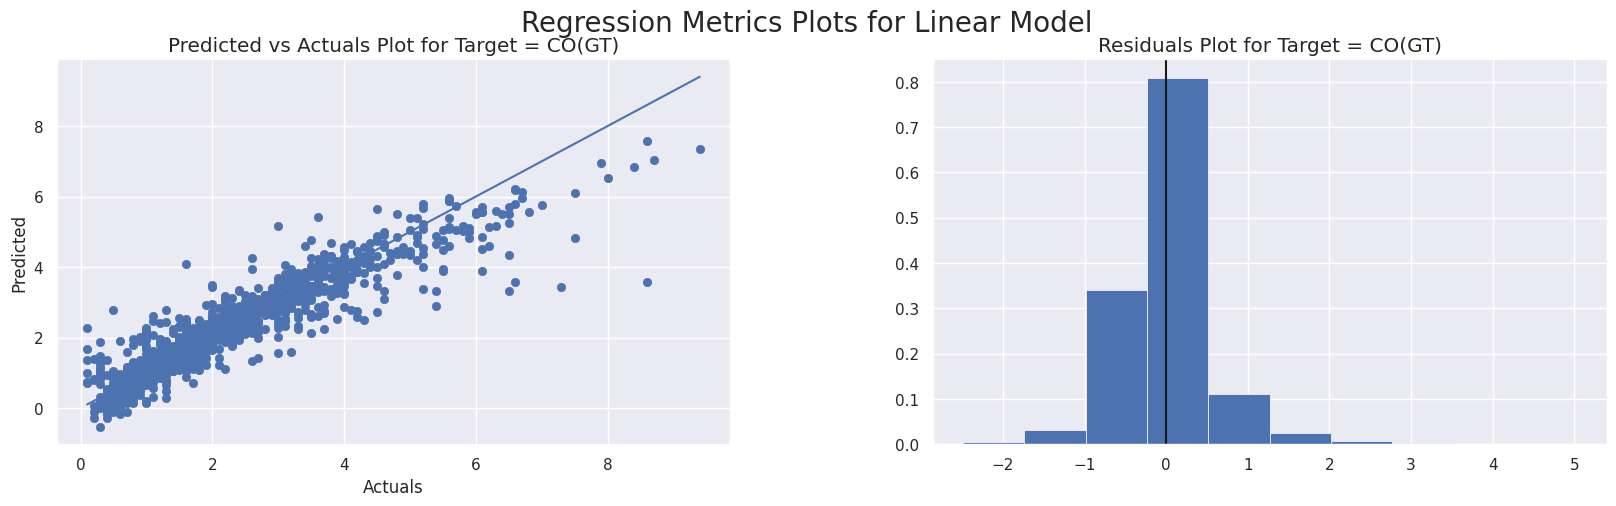

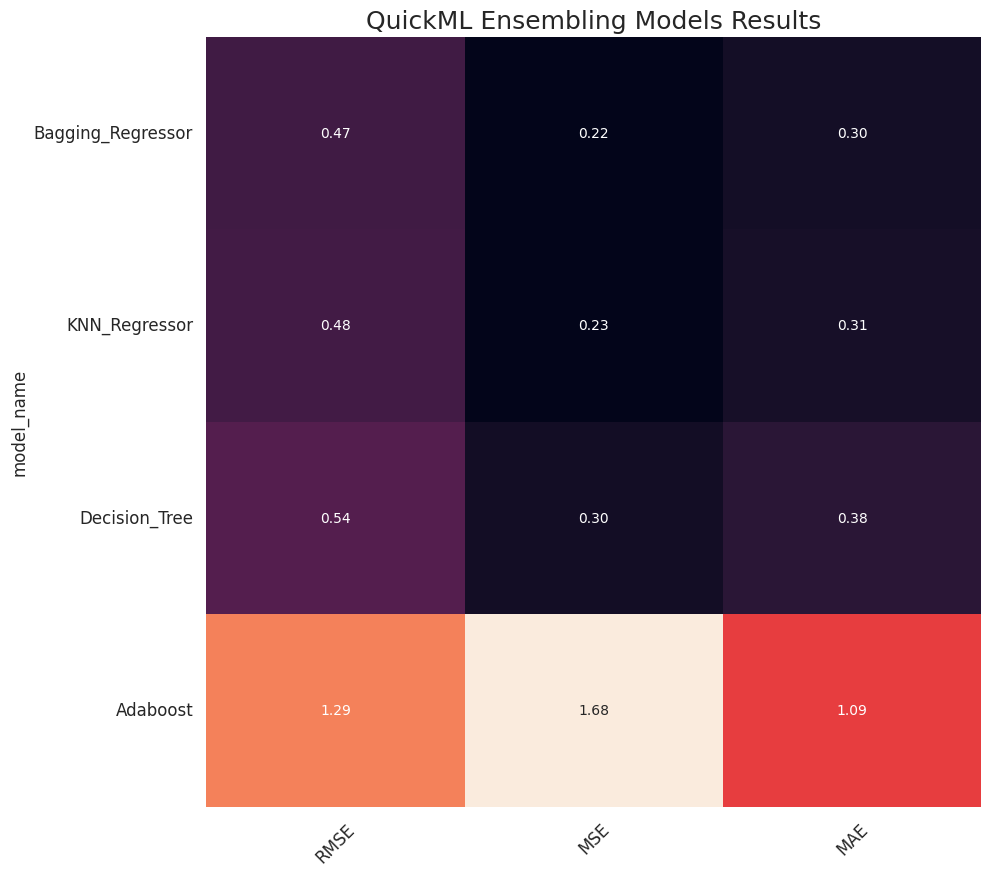

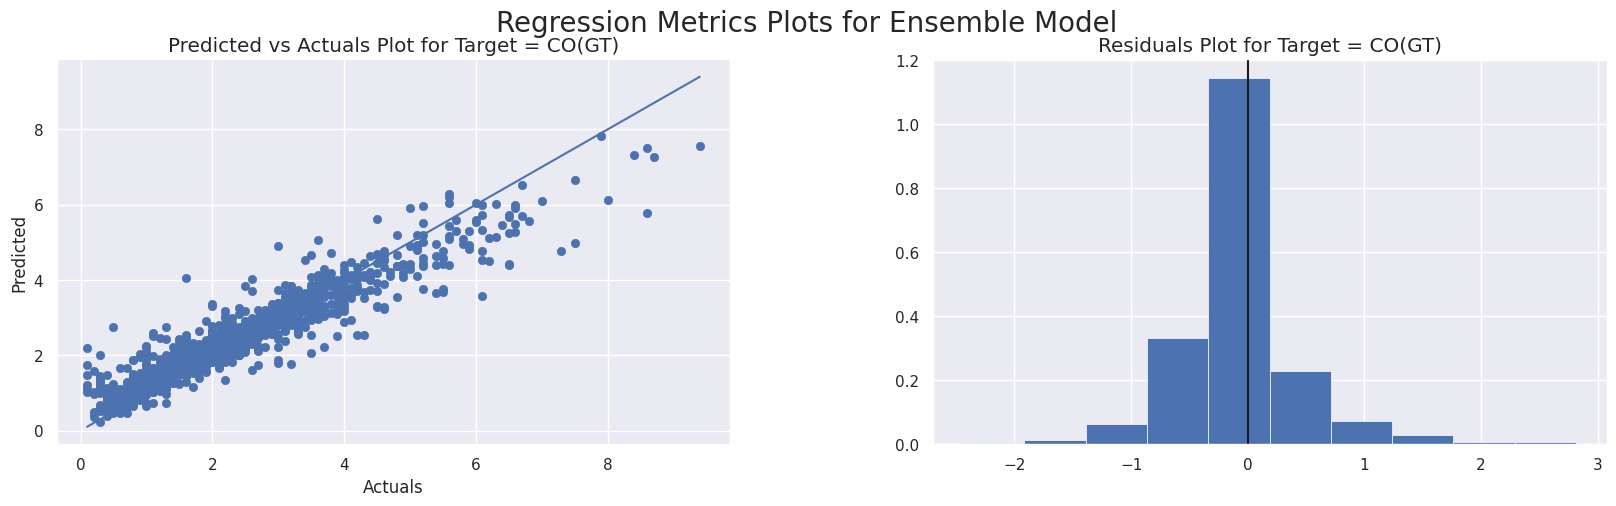

<Figure size 1500x500 with 0 Axes>

In [7]:

from autoviml.Auto_ViML import Auto_ViML
from sklearn.model_selection import train_test_split

# Drop unnecessary columns
data = data.drop(columns=['Date', 'Time'], errors='ignore')

# Define target variable and features
target = 'CO(GT)'
X = data.drop(columns=[target], errors='ignore')
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare combined training DataFrame for AutoViML
train_data = X_train.copy()
train_data[target] = y_train

# Run AutoViML
model, features, trainm, testm = Auto_ViML(
    train=train_data,         # Training data with target included
    target=target,            # Target variable name
    test=X_test,              # Test data (features only)
    sample_submission=None,   # Not needed
    hyper_param='RS',         # Random search for hyperparameter tuning
    feature_reduction=True,   # Enable feature reduction
    scoring_parameter='rmse', # Scoring metric
    verbose=1
)